In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from MultiQuadric_Matrix_Ops import *
import time

# Lorenz 1963

In [2]:
par = np.array([10,28,8/3])

x0 = np.array([1,0.2,19])
t = np.arange(0,500,0.002)

#lorenz63 model
def lorenz63(n, t):
    #gNa,ENa,gK,EK,gL,EL,Vm1,dVm,taum0,taum1,Vh0,dVh,tauh0,tauh1,Vn1,dVn,taun0,taun1,F = p
    x,y,z = n
    dXdt = [par[0]*(-x + y),
        x*(par[1] - z) - y,
        -par[2]*z + x*y]
    return dXdt
solL63 = odeint(lorenz63,x0,t)

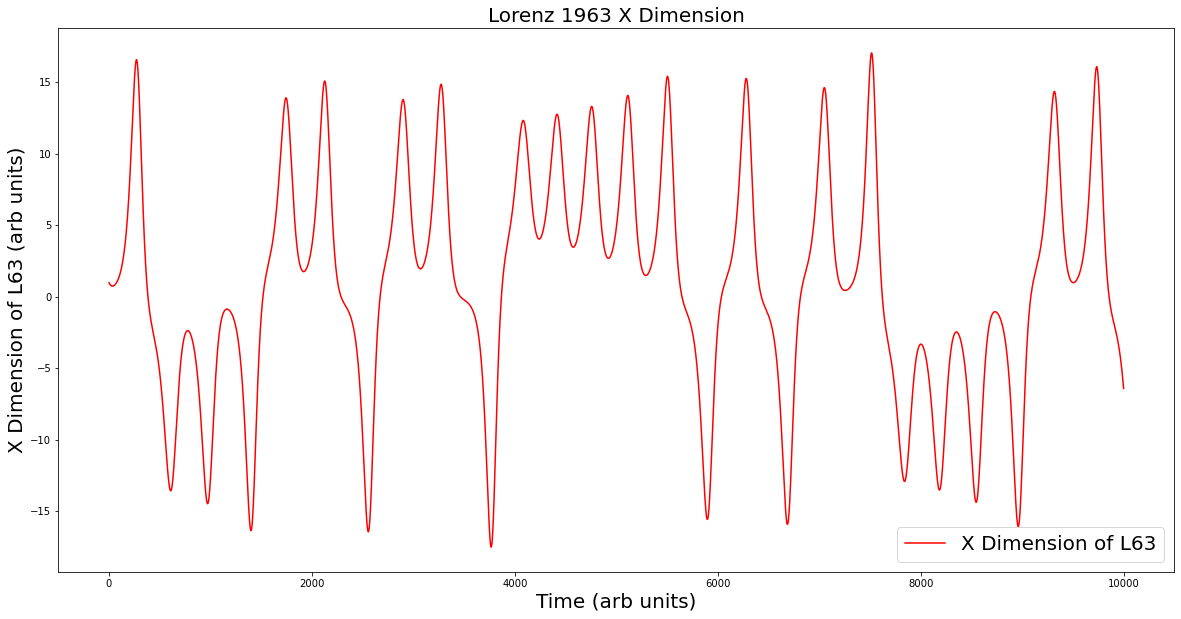

In [3]:
plt.figure(figsize=(20,10))
plt.plot(solL63.T[0][0:10000],color = 'r',label = 'X Dimension of L63')
plt.xlabel('Time (arb units)',fontsize=20)
plt.ylabel('X Dimension of L63 (arb units)',fontsize=20)
plt.legend(fontsize=20)
plt.title('Lorenz 1963 X Dimension',fontsize=20)
#plt.savefig('L63 Update Graph')
plt.show()

In [4]:
XData = solL63.T
NoCenters = 500
Length = 10000


start_time = time.time()
DDF = MultiQMat()
Center = DDF.KmeanCenter(solL63[0:Length].T,NoCenters,Length)
np.save('Center_L63_500c_10k_002',Center)
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.822319030761719 seconds ---


In [5]:
PredLength = 10000
beta = 1e-8
R = 10
alpha = 0.6
D = 3

start_time = time.time()
Funky = DDF.FuncApproxF(XData,Length,Center,beta,R,alpha,D)
Pred = DDF.PredictIntoTheFuture(Funky,PredLength,DDF.FinalX)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.6351690292358398 seconds ---


In [6]:
Lyap_large = 0.9056
maxx = PredLength
X = np.arange(0,maxx*0.002*Lyap_large,0.002*Lyap_large)

1e-08
10
0.6


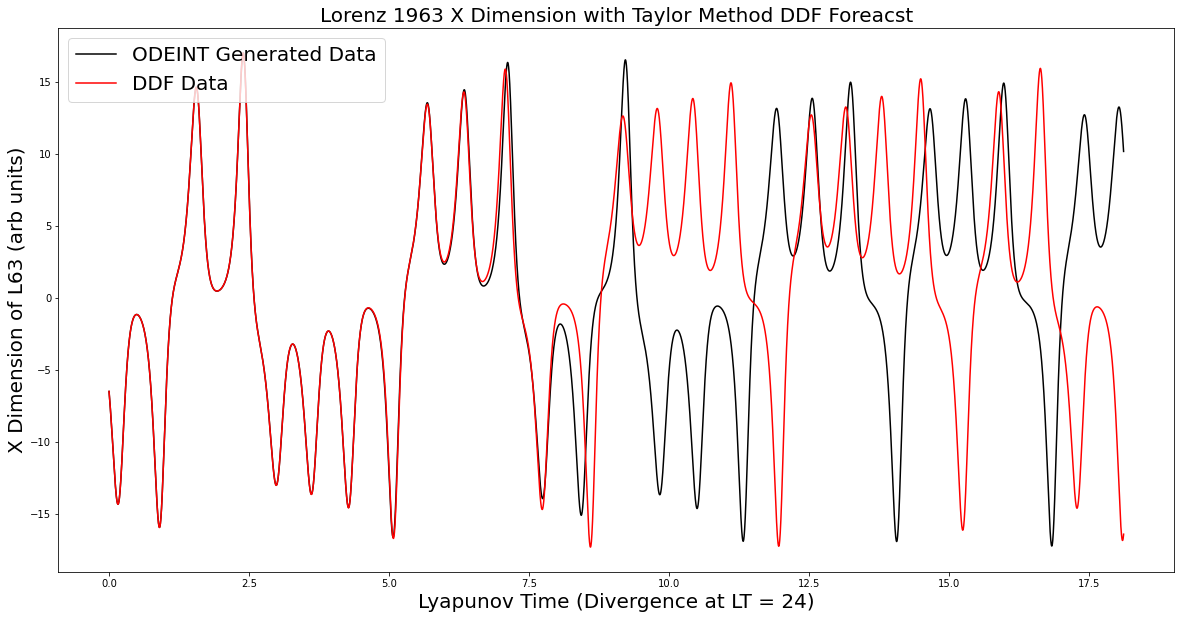

In [7]:
print(beta)
print(R)
print(alpha)
plt.figure(figsize=(20,10))
plt.plot(X,XData[0,Length:Length+PredLength],color = 'black',label = 'ODEINT Generated Data')
plt.plot(X,Pred[0],color = 'r',label = 'DDF Data')
plt.xlabel('Lyapunov Time (Divergence at LT = 24)',fontsize=20)
plt.ylabel('X Dimension of L63 (arb units)',fontsize=20)
plt.legend(fontsize=20)
plt.title('Lorenz 1963 X Dimension with Taylor Method DDF Foreacst',fontsize=20)
#plt.savefig('L63 Taylor Method')
plt.show()

In [8]:
#Grid Search
for a in range(10):
    for i in range(10):
        for j in range(10):
            PredLength = 10000
            beta = 10**(-8+i)
            R = 10**(-8+j)
            alpha = a/10
            D = 3


            Funky = DDF.FuncApproxF(XData,Length,Center,beta,R,alpha,D)
            Pred = DDF.PredictIntoTheFuture(Funky,PredLength,DDF.FinalX)
            #print("--- %s seconds ---" % (time.time() - start_time))
            
            plt.figure(figsize=(20,10))
            plt.plot(X,XData[0,Length:Length+PredLength],color = 'black',label = 'ODEINT Generated Data')
            plt.plot(X,Pred[0],color = 'r',label = 'DDF Data')
            plt.xlabel('Lyapunov Time (Divergence at LT = ???)',fontsize=20)
            plt.ylabel('X Dimension of L63 (arb units)',fontsize=20)
            plt.legend(fontsize=20)
            plt.title('Lorenz 1963 X Dimension with Taylor Method DDF Foreacst',fontsize=20)
            plt.savefig(str(a)+'and'+str(i)+'and'+str(j))
            plt.show()

# Colpitts

In [9]:
#Let's start with the Colpitts Oscillator
par = np.array([5,0.0797,0.6898,6.2723]) #Alpha, gamma, q, eta

x0 = np.array([1,0.2,19])
t = np.arange(0,5000,0.02)

#lorenz63 model
def colpit(n, t):
    #gNa,ENa,gK,EK,gL,EL,Vm1,dVm,taum0,taum1,Vh0,dVh,tauh0,tauh1,Vn1,dVn,taun0,taun1,F = p
    x,y,z = n
    dXdt = [par[0]*y,
        -par[1]*(x+z)-y*par[2],
        par[3]*(y+1-np.exp(-x))]
    return dXdt
solCol = odeint(colpit,x0,t)

In [11]:
XData = solCol.T
NoCenters = 1000
Length = 50000


start_time = time.time()
DDF = MultiQMat()
Center = DDF.KmeanCenter(solCol[0:Length].T,NoCenters,Length)
#Center = np.load('Center_L63_1kc_50k_002.npy')
np.save('Center_Colpitts_500c_10k_02',Center)
print("--- %s seconds ---" % (time.time() - start_time))

--- 46.210302114486694 seconds ---


In [12]:
PredLength = 6000
beta = 0.018772874248566572
R = 0.013545674322853224
alpha = 0.7
D = 3

start_time = time.time()
Funky = DDF.FuncApproxF(XData,Length,Center,beta,R,alpha,D)
Pred = DDF.PredictIntoTheFuture(Funky,PredLength,DDF.FinalX)
print("--- %s seconds ---" % (time.time() - start_time))

--- 5.064356088638306 seconds ---


In [13]:
Lyap_large = 0.07
maxx = PredLength
X = np.arange(0,maxx*0.02*Lyap_large,0.02*Lyap_large)

0.018772874248566572
0.013545674322853224
0.7


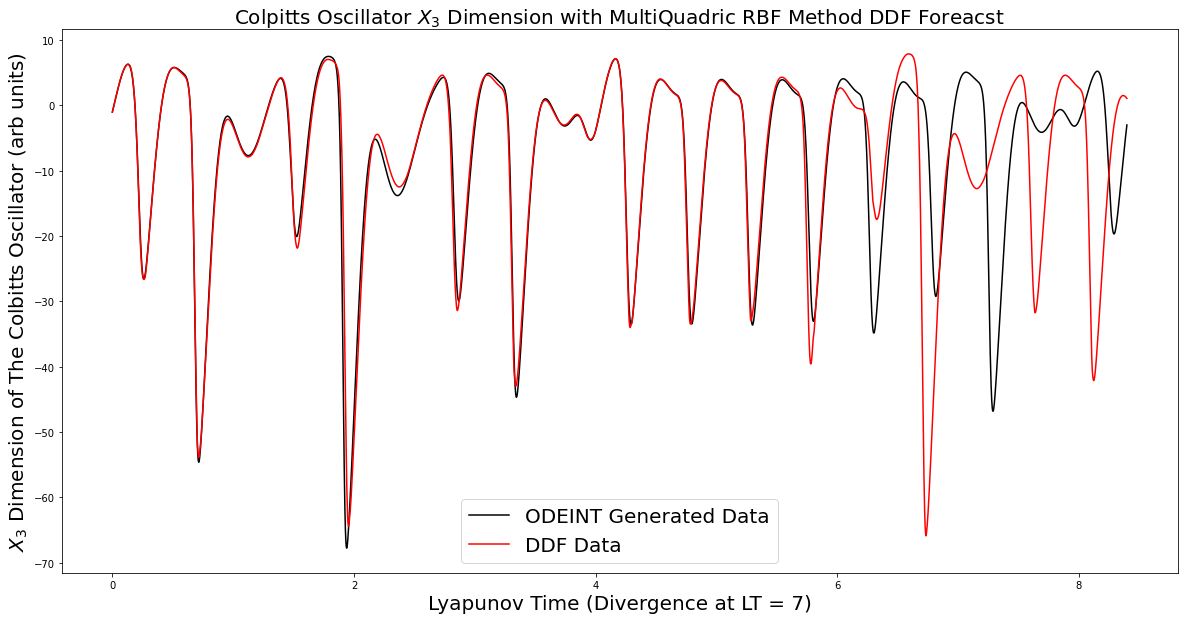

In [14]:
print(beta)
print(R)
print(alpha)
plt.figure(figsize=(20,10))
plt.plot(X,XData[2,Length:Length+PredLength],color = 'black',label = 'ODEINT Generated Data')
plt.plot(X,Pred[2],color = 'r',label = 'DDF Data')
plt.xlabel('Lyapunov Time (Divergence at LT = 7)',fontsize=20)
plt.ylabel('$X_3$ Dimension of The Colbitts Oscillator (arb units)',fontsize=20)
plt.legend(fontsize=20)
plt.title('Colpitts Oscillator $X_3$ Dimension with MultiQuadric RBF Method DDF Foreacst',fontsize=20)
plt.savefig('Colpitts RBF Method')
plt.show()

In [15]:
#Gird Search
for a in range(10):
    for i in range(10):
        for j in range(10):
            PredLength = 10000
            beta = 10**(-8+i)
            R = 10**(-8+j)
            alpha = (a+1)/10
            D = 3


            Funky = DDF.FuncApproxF(XData,Length,Center,beta,R,alpha,D)
            Pred = DDF.PredictIntoTheFuture(Funky,PredLength,DDF.FinalX)
            #print("--- %s seconds ---" % (time.time() - start_time))

            plt.figure(figsize=(20,10))
            plt.plot(X,XData[0,Length:Length+PredLength],color = 'black',label = 'ODEINT Generated Data')
            plt.plot(X,Pred[0],color = 'r',label = 'DDF Data')
            plt.xlabel('Lyapunov Time (Divergence at LT = ???)',fontsize=20)
            plt.ylabel('X Dimension of L63 (arb units)',fontsize=20)
            plt.legend(fontsize=20)
            plt.title('Lorenz 1963 X Dimension with Taylor Method DDF Foreacst',fontsize=20)
            plt.savefig(str(a)+'and'+str(i)+'and'+str(j))
            plt.show()